<a href="https://colab.research.google.com/github/Narendraiitg/ANN_Classifier_on_BreastCancer/blob/main/ANN_Classifier_on_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [4]:
import pandas as pd
import io 
data= pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
import seaborn as sns

Benign 357
Malignanat 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


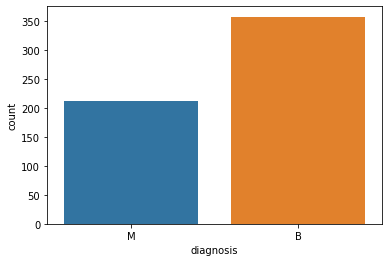

In [7]:
ax=sns.countplot(data['diagnosis'], label='Count')
B,M= data['diagnosis'].value_counts()
print("Benign", B)
print("Malignanat", M)



From the head of data we can see that the atribute no 32 do not have any significance so we can remove that entire column

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
del data['Unnamed: 32']

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


So we succesfully removed the unnammed column

# Data Preprocessing

In [13]:
# Seperating the dependent and independent variables
X= data.iloc[:,2:].values
y= data.iloc[:, 1].values

In [14]:
# Encoding categorial data 
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
y= LE.fit_transform(y)

Above encoding converted our categorial data of output attribute to the numerical one ie. 0 and 1

In [15]:
# Spiliting the data set into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.1, random_state=0)


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)


In [17]:
X_train

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

All the values in each columns of the input attributes are normalized between -1 and 1

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
# Adding the input and first hidden layer 
classifier= Sequential()

#The first hidden layer has 16 nodes and uses the relu activation function.
classifier.add(Dense(16, input_shape=(30,), activation='relu'))

# The second hidden layer has 16 nodes and uses the relu activation function.
classifier.add(Dense(16, activation='relu'))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))


In [43]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics= ['accuracy'])

In [44]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150, verbose=0)

In [45]:
# make probability predictions with the model
predictions = classifier.predict(X_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]

2/2 [==============================] - 0s 4ms/step


In [46]:
# make class predictions with the model
predictions = (classifier.predict(X_test) > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


In [47]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predictions)

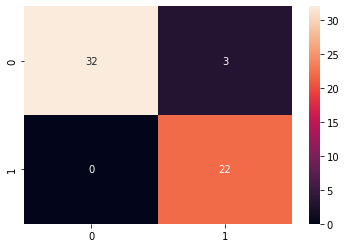

In [48]:
sns.heatmap(cm, annot=True)